# Plot of the optimality factor proved in Theorem 1

Appears as Figure 7 in the paper.

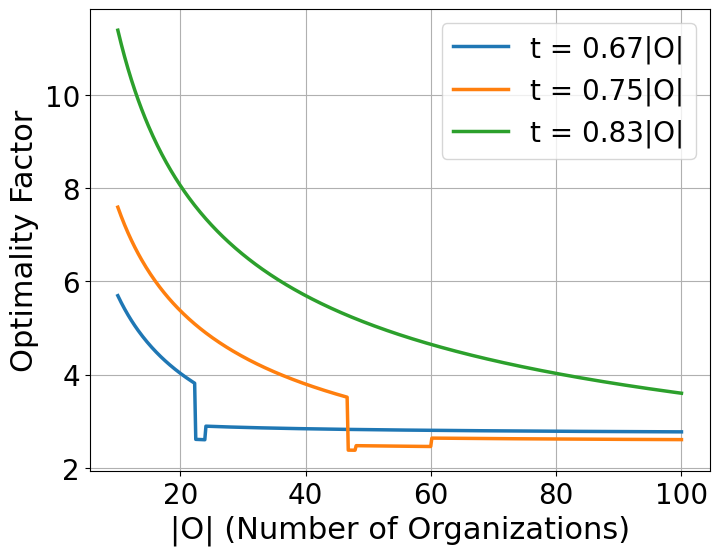

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams.update({
    'font.size': 16,         # Base font size
    'axes.titlesize': 22,    # Title font size
    'axes.labelsize': 22,    # X and Y label font size
    'xtick.labelsize': 20,   # X-axis tick labels font size
    'ytick.labelsize': 20,   # Y-axis tick labels font size
    'legend.fontsize': 20    # Legend font size
})

# Define the range for |O|
O_values = np.linspace(10, 100, 500)  # Varying number of organizations

# Define values of t as fractions of |O|
t_fractions = [2/3, 3/4, 5/6]

# Initialize the plot
plt.figure(figsize=(8, 6))

# Iterate over different t values
for t_frac in t_fractions:
    t_values = t_frac * O_values
    f_values = (O_values - t_values) / O_values

    # Initialize k_values as a vector of zeros
    k_values = np.zeros_like(O_values)
    
    # Compute k separately for different conditions
    condition_1 = t_values < (O_values + 2 - 2*np.sqrt(O_values))
    
    sqrt_term = 4 + O_values**2 - 4*t_values - 2*O_values*t_values + t_values**2
    
    k_values[condition_1] = np.floor((2 + O_values[condition_1] - t_values[condition_1]) / 2 - np.sqrt(sqrt_term[condition_1]) / 2)
    k_values[~condition_1] = np.floor(np.sqrt(O_values[~condition_1]))

    # Compute the optimality factor
    factor_1 = 2 + 2 / (k_values**2 * f_values) + 1 / (np.sqrt(O_values) - 1/2)
    factor_2 = 6 / (np.sqrt(O_values) * f_values)
    
    # Use the appropriate bound depending on t
    optimality_factor = np.where(condition_1, factor_1, factor_2)
    
    # Plot the curve
    plt.plot(O_values, optimality_factor, label=f't = {t_frac:.2f}|O|', linewidth=2.5)

# Labels and legend
plt.xlabel('|O| (Number of Organizations)')
plt.ylabel('Optimality Factor')
plt.legend()
plt.grid(True)


# Show the plot
plt.show()